# Load images

In [1]:
import cv2
import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib
import wget
import random

import glob
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
from PIL import Image
import urllib
import wget

In [2]:
flowers = glob.glob('./data/flr_*.jpg')
fungus = glob.glob('./data/fgs_*.jpg')
rocks = glob.glob('./data/rck_*.jpg')

pixel_flowers = glob.glob('./data/pxl_flower_*.jpeg')
pixel_umbrella = glob.glob('./data/pxl_umbrella_*.jpeg')
print("There are %s, %s flower, %s fungus, %s rock and %s umbrella pictures" %(len(flowers), len(pixel_flowers), len(fungus), len(rocks), len(pixel_umbrella)))

There are 855, 1850 flower, 731 fungus, 963 rock and 422 umbrella pictures


# Resize images

In [3]:
index = random.randint(1, len(pixel_flowers))
filepath = pixel_flowers[index]

img = mpimg.imread(filepath)
img.shape

(2116, 3515, 3)

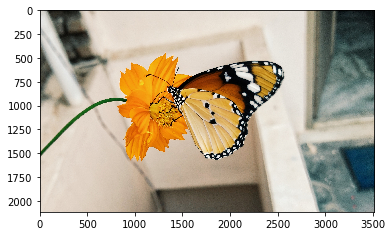

In [4]:
imgplot = plt.imshow(img)
plt.show()

In [5]:
# VGG models uses [224, 224] input size images
width = 224
height = 224

dim = (width, height)
resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) 

resized.shape

(224, 224, 3)

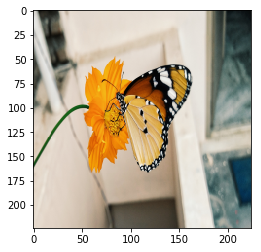

In [6]:
imgplot = plt.imshow(resized)
plt.show()

In [7]:
def resized(width, height, img):
    dim = (width, height)
    img_resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return img_resized[:,:,0:3] # And only take the RGB

# Store rized images to npz

In [8]:
import time

bundle_list = [flowers, fungus, rocks, pixel_flowers, pixel_umbrella]
npz_list = ["./npz/flr-imgs224.npz", 
             "./npz/fgs-imgs224.npz", 
             "./npz/rck-imgs224.npz", 
             "./npz/pxl_flr-imgs224.npz", 
             "./npz/pxl_umb-imgs224.npz"]
             
for i in range(len(bundle_list)):
    process_file = bundle_list[i]
    save_filename = npz_list[i]
    resized_array = []
    for j in range(len(process_file)):
        try:
            item_filepath = process_file[j]

            img = mpimg.imread(item_filepath)
            if len(img.shape) == 3 and img.shape[2] == 3:
                resized_img = resized(224, 224, img) 
                print(j, item_filepath, resized_img.shape)
                resized_array.append(resized_img)
        except:
            print("Error reading the image!")
    output = np.array(resized_array)
    np.savez(save_filename, output)

0 ./data\flr_00001.jpg (224, 224, 3)
1 ./data\flr_00005.jpg (224, 224, 3)
2 ./data\flr_00011.jpg (224, 224, 3)
3 ./data\flr_00014.jpg (224, 224, 3)
4 ./data\flr_00017.jpg (224, 224, 3)
5 ./data\flr_00020.jpg (224, 224, 3)
6 ./data\flr_00024.jpg (224, 224, 3)
7 ./data\flr_00025.jpg (224, 224, 3)
8 ./data\flr_00027.jpg (224, 224, 3)
9 ./data\flr_00028.jpg (224, 224, 3)
10 ./data\flr_00034.jpg (224, 224, 3)
11 ./data\flr_00035.jpg (224, 224, 3)
12 ./data\flr_00040.jpg (224, 224, 3)
13 ./data\flr_00045.jpg (224, 224, 3)
14 ./data\flr_00046.jpg (224, 224, 3)
15 ./data\flr_00047.jpg (224, 224, 3)
16 ./data\flr_00048.jpg (224, 224, 3)
17 ./data\flr_00054.jpg (224, 224, 3)
18 ./data\flr_00055.jpg (224, 224, 3)
19 ./data\flr_00056.jpg (224, 224, 3)
20 ./data\flr_00061.jpg (224, 224, 3)
21 ./data\flr_00063.jpg (224, 224, 3)
22 ./data\flr_00064.jpg (224, 224, 3)
23 ./data\flr_00075.jpg (224, 224, 3)
24 ./data\flr_00077.jpg (224, 224, 3)
25 ./data\flr_00078.jpg (224, 224, 3)
26 ./data\flr_00081.jp

216 ./data\flr_00871.jpg (224, 224, 3)
217 ./data\flr_00873.jpg (224, 224, 3)
218 ./data\flr_00877.jpg (224, 224, 3)
219 ./data\flr_00882.jpg (224, 224, 3)
220 ./data\flr_00885.jpg (224, 224, 3)
221 ./data\flr_00887.jpg (224, 224, 3)
222 ./data\flr_00893.jpg (224, 224, 3)
223 ./data\flr_00894.jpg (224, 224, 3)
224 ./data\flr_00897.jpg (224, 224, 3)
225 ./data\flr_00899.jpg (224, 224, 3)
226 ./data\flr_00901.jpg (224, 224, 3)
227 ./data\flr_00902.jpg (224, 224, 3)
228 ./data\flr_00904.jpg (224, 224, 3)
229 ./data\flr_00905.jpg (224, 224, 3)
230 ./data\flr_00908.jpg (224, 224, 3)
231 ./data\flr_00910.jpg (224, 224, 3)
232 ./data\flr_00912.jpg (224, 224, 3)
233 ./data\flr_00915.jpg (224, 224, 3)
234 ./data\flr_00921.jpg (224, 224, 3)
235 ./data\flr_00922.jpg (224, 224, 3)
236 ./data\flr_00926.jpg (224, 224, 3)
237 ./data\flr_00927.jpg (224, 224, 3)
238 ./data\flr_00928.jpg (224, 224, 3)
239 ./data\flr_00931.jpg (224, 224, 3)
240 ./data\flr_00937.jpg (224, 224, 3)
241 ./data\flr_00938.jpg 

430 ./data\flr_01449.jpg (224, 224, 3)
431 ./data\flr_01450.jpg (224, 224, 3)
432 ./data\flr_01451.jpg (224, 224, 3)
433 ./data\flr_01452.jpg (224, 224, 3)
434 ./data\flr_01453.jpg (224, 224, 3)
435 ./data\flr_01454.jpg (224, 224, 3)
436 ./data\flr_01455.jpg (224, 224, 3)
437 ./data\flr_01456.jpg (224, 224, 3)
438 ./data\flr_01457.jpg (224, 224, 3)
439 ./data\flr_01458.jpg (224, 224, 3)
440 ./data\flr_01459.jpg (224, 224, 3)
441 ./data\flr_01461.jpg (224, 224, 3)
442 ./data\flr_01462.jpg (224, 224, 3)
443 ./data\flr_01463.jpg (224, 224, 3)
444 ./data\flr_01464.jpg (224, 224, 3)
445 ./data\flr_01466.jpg (224, 224, 3)
446 ./data\flr_01468.jpg (224, 224, 3)
447 ./data\flr_01469.jpg (224, 224, 3)
448 ./data\flr_01471.jpg (224, 224, 3)
449 ./data\flr_01472.jpg (224, 224, 3)
450 ./data\flr_01473.jpg (224, 224, 3)
451 ./data\flr_01474.jpg (224, 224, 3)
452 ./data\flr_01475.jpg (224, 224, 3)
453 ./data\flr_01476.jpg (224, 224, 3)
454 ./data\flr_01477.jpg (224, 224, 3)
455 ./data\flr_01478.jpg 

648 ./data\flr_01699.jpg (224, 224, 3)
649 ./data\flr_01700.jpg (224, 224, 3)
650 ./data\flr_01701.jpg (224, 224, 3)
651 ./data\flr_01702.jpg (224, 224, 3)
652 ./data\flr_01703.jpg (224, 224, 3)
653 ./data\flr_01704.jpg (224, 224, 3)
654 ./data\flr_01705.jpg (224, 224, 3)
655 ./data\flr_01706.jpg (224, 224, 3)
656 ./data\flr_01707.jpg (224, 224, 3)
657 ./data\flr_01708.jpg (224, 224, 3)
658 ./data\flr_01709.jpg (224, 224, 3)
659 ./data\flr_01710.jpg (224, 224, 3)
660 ./data\flr_01711.jpg (224, 224, 3)
661 ./data\flr_01712.jpg (224, 224, 3)
662 ./data\flr_01713.jpg (224, 224, 3)
663 ./data\flr_01714.jpg (224, 224, 3)
664 ./data\flr_01715.jpg (224, 224, 3)
665 ./data\flr_01716.jpg (224, 224, 3)
666 ./data\flr_01717.jpg (224, 224, 3)
667 ./data\flr_01718.jpg (224, 224, 3)
668 ./data\flr_01719.jpg (224, 224, 3)
669 ./data\flr_01720.jpg (224, 224, 3)
670 ./data\flr_01721.jpg (224, 224, 3)
671 ./data\flr_01722.jpg (224, 224, 3)
672 ./data\flr_01723.jpg (224, 224, 3)
673 ./data\flr_01724.jpg 

7 ./data\fgs_00009.jpg (224, 224, 3)
8 ./data\fgs_00010.jpg (224, 224, 3)
9 ./data\fgs_00011.jpg (224, 224, 3)
10 ./data\fgs_00013.jpg (224, 224, 3)
11 ./data\fgs_00014.jpg (224, 224, 3)
12 ./data\fgs_00016.jpg (224, 224, 3)
13 ./data\fgs_00017.jpg (224, 224, 3)
14 ./data\fgs_00018.jpg (224, 224, 3)
15 ./data\fgs_00019.jpg (224, 224, 3)
16 ./data\fgs_00020.jpg (224, 224, 3)
17 ./data\fgs_00021.jpg (224, 224, 3)
18 ./data\fgs_00022.jpg (224, 224, 3)
19 ./data\fgs_00023.jpg (224, 224, 3)
20 ./data\fgs_00024.jpg (224, 224, 3)
21 ./data\fgs_00025.jpg (224, 224, 3)
22 ./data\fgs_00026.jpg (224, 224, 3)
23 ./data\fgs_00027.jpg (224, 224, 3)
24 ./data\fgs_00028.jpg (224, 224, 3)
25 ./data\fgs_00030.jpg (224, 224, 3)
26 ./data\fgs_00031.jpg (224, 224, 3)
27 ./data\fgs_00032.jpg (224, 224, 3)
28 ./data\fgs_00033.jpg (224, 224, 3)
29 ./data\fgs_00036.jpg (224, 224, 3)
30 ./data\fgs_00037.jpg (224, 224, 3)
31 ./data\fgs_00038.jpg (224, 224, 3)
32 ./data\fgs_00039.jpg (224, 224, 3)
33 ./data\fgs_0

224 ./data\fgs_00384.jpg (224, 224, 3)
225 ./data\fgs_00387.jpg (224, 224, 3)
226 ./data\fgs_00388.jpg (224, 224, 3)
227 ./data\fgs_00389.jpg (224, 224, 3)
228 ./data\fgs_00390.jpg (224, 224, 3)
229 ./data\fgs_00391.jpg (224, 224, 3)
230 ./data\fgs_00392.jpg (224, 224, 3)
231 ./data\fgs_00393.jpg (224, 224, 3)
232 ./data\fgs_00395.jpg (224, 224, 3)
233 ./data\fgs_00397.jpg (224, 224, 3)
234 ./data\fgs_00401.jpg (224, 224, 3)
235 ./data\fgs_00402.jpg (224, 224, 3)
236 ./data\fgs_00404.jpg (224, 224, 3)
237 ./data\fgs_00408.jpg (224, 224, 3)
238 ./data\fgs_00410.jpg (224, 224, 3)
239 ./data\fgs_00412.jpg (224, 224, 3)
240 ./data\fgs_00413.jpg (224, 224, 3)
241 ./data\fgs_00415.jpg (224, 224, 3)
242 ./data\fgs_00417.jpg (224, 224, 3)
243 ./data\fgs_00418.jpg (224, 224, 3)
244 ./data\fgs_00419.jpg (224, 224, 3)
245 ./data\fgs_00420.jpg (224, 224, 3)
246 ./data\fgs_00421.jpg (224, 224, 3)
247 ./data\fgs_00425.jpg (224, 224, 3)
248 ./data\fgs_00427.jpg (224, 224, 3)
249 ./data\fgs_00430.jpg 

442 ./data\fgs_00795.jpg (224, 224, 3)
443 ./data\fgs_00799.jpg (224, 224, 3)
444 ./data\fgs_00800.jpg (224, 224, 3)
445 ./data\fgs_00801.jpg (224, 224, 3)
446 ./data\fgs_00802.jpg (224, 224, 3)
447 ./data\fgs_00804.jpg (224, 224, 3)
448 ./data\fgs_00806.jpg (224, 224, 3)
449 ./data\fgs_00807.jpg (224, 224, 3)
450 ./data\fgs_00808.jpg (224, 224, 3)
451 ./data\fgs_00809.jpg (224, 224, 3)
452 ./data\fgs_00816.jpg (224, 224, 3)
453 ./data\fgs_00818.jpg (224, 224, 3)
454 ./data\fgs_00821.jpg (224, 224, 3)
455 ./data\fgs_00823.jpg (224, 224, 3)
456 ./data\fgs_00824.jpg (224, 224, 3)
457 ./data\fgs_00826.jpg (224, 224, 3)
458 ./data\fgs_00827.jpg (224, 224, 3)
459 ./data\fgs_00829.jpg (224, 224, 3)
460 ./data\fgs_00830.jpg (224, 224, 3)
461 ./data\fgs_00837.jpg (224, 224, 3)
462 ./data\fgs_00838.jpg (224, 224, 3)
463 ./data\fgs_00840.jpg (224, 224, 3)
464 ./data\fgs_00842.jpg (224, 224, 3)
465 ./data\fgs_00844.jpg (224, 224, 3)
466 ./data\fgs_00845.jpg (224, 224, 3)
467 ./data\fgs_00846.jpg 

663 ./data\fgs_01119.jpg (224, 224, 3)
664 ./data\fgs_01121.jpg (224, 224, 3)
665 ./data\fgs_01122.jpg (224, 224, 3)
666 ./data\fgs_01123.jpg (224, 224, 3)
667 ./data\fgs_01124.jpg (224, 224, 3)
668 ./data\fgs_01125.jpg (224, 224, 3)
669 ./data\fgs_01127.jpg (224, 224, 3)
670 ./data\fgs_01128.jpg (224, 224, 3)
671 ./data\fgs_01129.jpg (224, 224, 3)
672 ./data\fgs_01130.jpg (224, 224, 3)
673 ./data\fgs_01131.jpg (224, 224, 3)
674 ./data\fgs_01132.jpg (224, 224, 3)
675 ./data\fgs_01133.jpg (224, 224, 3)
676 ./data\fgs_01134.jpg (224, 224, 3)
677 ./data\fgs_01136.jpg (224, 224, 3)
678 ./data\fgs_01140.jpg (224, 224, 3)
679 ./data\fgs_01141.jpg (224, 224, 3)
680 ./data\fgs_01142.jpg (224, 224, 3)
681 ./data\fgs_01145.jpg (224, 224, 3)
682 ./data\fgs_01147.jpg (224, 224, 3)
683 ./data\fgs_01148.jpg (224, 224, 3)
684 ./data\fgs_01149.jpg (224, 224, 3)
685 ./data\fgs_01150.jpg (224, 224, 3)
686 ./data\fgs_01151.jpg (224, 224, 3)
687 ./data\fgs_01153.jpg (224, 224, 3)
688 ./data\fgs_01154.jpg 

145 ./data\rck_00200.jpg (224, 224, 3)
146 ./data\rck_00202.jpg (224, 224, 3)
147 ./data\rck_00203.jpg (224, 224, 3)
148 ./data\rck_00204.jpg (224, 224, 3)
149 ./data\rck_00205.jpg (224, 224, 3)
150 ./data\rck_00207.jpg (224, 224, 3)
151 ./data\rck_00208.jpg (224, 224, 3)
152 ./data\rck_00209.jpg (224, 224, 3)
153 ./data\rck_00211.jpg (224, 224, 3)
154 ./data\rck_00213.jpg (224, 224, 3)
155 ./data\rck_00214.jpg (224, 224, 3)
156 ./data\rck_00215.jpg (224, 224, 3)
157 ./data\rck_00216.jpg (224, 224, 3)
158 ./data\rck_00218.jpg (224, 224, 3)
159 ./data\rck_00219.jpg (224, 224, 3)
160 ./data\rck_00221.jpg (224, 224, 3)
161 ./data\rck_00222.jpg (224, 224, 3)
162 ./data\rck_00223.jpg (224, 224, 3)
163 ./data\rck_00225.jpg (224, 224, 3)
164 ./data\rck_00226.jpg (224, 224, 3)
165 ./data\rck_00227.jpg (224, 224, 3)
166 ./data\rck_00228.jpg (224, 224, 3)
167 ./data\rck_00232.jpg (224, 224, 3)
168 ./data\rck_00233.jpg (224, 224, 3)
170 ./data\rck_00236.jpg (224, 224, 3)
171 ./data\rck_00237.jpg 

370 ./data\rck_00521.jpg (224, 224, 3)
371 ./data\rck_00522.jpg (224, 224, 3)
372 ./data\rck_00523.jpg (224, 224, 3)
373 ./data\rck_00524.jpg (224, 224, 3)
374 ./data\rck_00526.jpg (224, 224, 3)
375 ./data\rck_00527.jpg (224, 224, 3)
376 ./data\rck_00529.jpg (224, 224, 3)
377 ./data\rck_00530.jpg (224, 224, 3)
378 ./data\rck_00531.jpg (224, 224, 3)
379 ./data\rck_00532.jpg (224, 224, 3)
380 ./data\rck_00533.jpg (224, 224, 3)
381 ./data\rck_00535.jpg (224, 224, 3)
382 ./data\rck_00537.jpg (224, 224, 3)
383 ./data\rck_00538.jpg (224, 224, 3)
384 ./data\rck_00540.jpg (224, 224, 3)
386 ./data\rck_00545.jpg (224, 224, 3)
387 ./data\rck_00546.jpg (224, 224, 3)
388 ./data\rck_00549.jpg (224, 224, 3)
389 ./data\rck_00550.jpg (224, 224, 3)
390 ./data\rck_00552.jpg (224, 224, 3)
391 ./data\rck_00553.jpg (224, 224, 3)
392 ./data\rck_00554.jpg (224, 224, 3)
393 ./data\rck_00555.jpg (224, 224, 3)
394 ./data\rck_00556.jpg (224, 224, 3)
395 ./data\rck_00557.jpg (224, 224, 3)
396 ./data\rck_00559.jpg 

590 ./data\rck_00812.jpg (224, 224, 3)
591 ./data\rck_00813.jpg (224, 224, 3)
592 ./data\rck_00814.jpg (224, 224, 3)
593 ./data\rck_00816.jpg (224, 224, 3)
594 ./data\rck_00817.jpg (224, 224, 3)
595 ./data\rck_00818.jpg (224, 224, 3)
596 ./data\rck_00819.jpg (224, 224, 3)
598 ./data\rck_00821.jpg (224, 224, 3)
599 ./data\rck_00822.jpg (224, 224, 3)
600 ./data\rck_00823.jpg (224, 224, 3)
601 ./data\rck_00824.jpg (224, 224, 3)
602 ./data\rck_00825.jpg (224, 224, 3)
603 ./data\rck_00826.jpg (224, 224, 3)
604 ./data\rck_00827.jpg (224, 224, 3)
605 ./data\rck_00828.jpg (224, 224, 3)
606 ./data\rck_00829.jpg (224, 224, 3)
607 ./data\rck_00830.jpg (224, 224, 3)
608 ./data\rck_00832.jpg (224, 224, 3)
609 ./data\rck_00833.jpg (224, 224, 3)
610 ./data\rck_00834.jpg (224, 224, 3)
611 ./data\rck_00835.jpg (224, 224, 3)
612 ./data\rck_00836.jpg (224, 224, 3)
613 ./data\rck_00837.jpg (224, 224, 3)
614 ./data\rck_00839.jpg (224, 224, 3)
615 ./data\rck_00842.jpg (224, 224, 3)
616 ./data\rck_00843.jpg 

803 ./data\rck_01083.jpg (224, 224, 3)
804 ./data\rck_01086.jpg (224, 224, 3)
805 ./data\rck_01087.jpg (224, 224, 3)
806 ./data\rck_01088.jpg (224, 224, 3)
807 ./data\rck_01089.jpg (224, 224, 3)
808 ./data\rck_01090.jpg (224, 224, 3)
809 ./data\rck_01091.jpg (224, 224, 3)
810 ./data\rck_01092.jpg (224, 224, 3)
811 ./data\rck_01093.jpg (224, 224, 3)
812 ./data\rck_01094.jpg (224, 224, 3)
814 ./data\rck_01096.jpg (224, 224, 3)
815 ./data\rck_01097.jpg (224, 224, 3)
816 ./data\rck_01099.jpg (224, 224, 3)
817 ./data\rck_01100.jpg (224, 224, 3)
818 ./data\rck_01104.jpg (224, 224, 3)
819 ./data\rck_01106.jpg (224, 224, 3)
820 ./data\rck_01108.jpg (224, 224, 3)
821 ./data\rck_01110.jpg (224, 224, 3)
822 ./data\rck_01112.jpg (224, 224, 3)
823 ./data\rck_01113.jpg (224, 224, 3)
824 ./data\rck_01115.jpg (224, 224, 3)
825 ./data\rck_01116.jpg (224, 224, 3)
826 ./data\rck_01117.jpg (224, 224, 3)
827 ./data\rck_01119.jpg (224, 224, 3)
828 ./data\rck_01120.jpg (224, 224, 3)
829 ./data\rck_01121.jpg 

44 ./data\pxl_flower_00044.jpeg (224, 224, 3)
45 ./data\pxl_flower_00045.jpeg (224, 224, 3)
46 ./data\pxl_flower_00046.jpeg (224, 224, 3)
47 ./data\pxl_flower_00047.jpeg (224, 224, 3)
48 ./data\pxl_flower_00048.jpeg (224, 224, 3)
49 ./data\pxl_flower_00049.jpeg (224, 224, 3)
50 ./data\pxl_flower_00050.jpeg (224, 224, 3)
51 ./data\pxl_flower_00051.jpeg (224, 224, 3)
52 ./data\pxl_flower_00052.jpeg (224, 224, 3)
53 ./data\pxl_flower_00053.jpeg (224, 224, 3)
54 ./data\pxl_flower_00054.jpeg (224, 224, 3)
55 ./data\pxl_flower_00055.jpeg (224, 224, 3)
56 ./data\pxl_flower_00056.jpeg (224, 224, 3)
57 ./data\pxl_flower_00057.jpeg (224, 224, 3)
58 ./data\pxl_flower_00058.jpeg (224, 224, 3)
59 ./data\pxl_flower_00059.jpeg (224, 224, 3)
60 ./data\pxl_flower_00060.jpeg (224, 224, 3)
61 ./data\pxl_flower_00061.jpeg (224, 224, 3)
62 ./data\pxl_flower_00062.jpeg (224, 224, 3)
63 ./data\pxl_flower_00063.jpeg (224, 224, 3)
64 ./data\pxl_flower_00064.jpeg (224, 224, 3)
65 ./data\pxl_flower_00065.jpeg (2

221 ./data\pxl_flower_00221.jpeg (224, 224, 3)
222 ./data\pxl_flower_00222.jpeg (224, 224, 3)
223 ./data\pxl_flower_00223.jpeg (224, 224, 3)
224 ./data\pxl_flower_00224.jpeg (224, 224, 3)
225 ./data\pxl_flower_00225.jpeg (224, 224, 3)
226 ./data\pxl_flower_00226.jpeg (224, 224, 3)
227 ./data\pxl_flower_00227.jpeg (224, 224, 3)
228 ./data\pxl_flower_00228.jpeg (224, 224, 3)
229 ./data\pxl_flower_00229.jpeg (224, 224, 3)
230 ./data\pxl_flower_00230.jpeg (224, 224, 3)
231 ./data\pxl_flower_00231.jpeg (224, 224, 3)
232 ./data\pxl_flower_00232.jpeg (224, 224, 3)
233 ./data\pxl_flower_00233.jpeg (224, 224, 3)
234 ./data\pxl_flower_00234.jpeg (224, 224, 3)
235 ./data\pxl_flower_00235.jpeg (224, 224, 3)
236 ./data\pxl_flower_00236.jpeg (224, 224, 3)
237 ./data\pxl_flower_00237.jpeg (224, 224, 3)
238 ./data\pxl_flower_00238.jpeg (224, 224, 3)
239 ./data\pxl_flower_00239.jpeg (224, 224, 3)
240 ./data\pxl_flower_00240.jpeg (224, 224, 3)
241 ./data\pxl_flower_00241.jpeg (224, 224, 3)
242 ./data\px

396 ./data\pxl_flower_00396.jpeg (224, 224, 3)
397 ./data\pxl_flower_00397.jpeg (224, 224, 3)
398 ./data\pxl_flower_00398.jpeg (224, 224, 3)
399 ./data\pxl_flower_00399.jpeg (224, 224, 3)
400 ./data\pxl_flower_00400.jpeg (224, 224, 3)
401 ./data\pxl_flower_00401.jpeg (224, 224, 3)
402 ./data\pxl_flower_00402.jpeg (224, 224, 3)
403 ./data\pxl_flower_00403.jpeg (224, 224, 3)
404 ./data\pxl_flower_00404.jpeg (224, 224, 3)
405 ./data\pxl_flower_00405.jpeg (224, 224, 3)
406 ./data\pxl_flower_00406.jpeg (224, 224, 3)
407 ./data\pxl_flower_00407.jpeg (224, 224, 3)
408 ./data\pxl_flower_00408.jpeg (224, 224, 3)
409 ./data\pxl_flower_00409.jpeg (224, 224, 3)
410 ./data\pxl_flower_00410.jpeg (224, 224, 3)
411 ./data\pxl_flower_00411.jpeg (224, 224, 3)
412 ./data\pxl_flower_00412.jpeg (224, 224, 3)
413 ./data\pxl_flower_00413.jpeg (224, 224, 3)
414 ./data\pxl_flower_00414.jpeg (224, 224, 3)
415 ./data\pxl_flower_00415.jpeg (224, 224, 3)
416 ./data\pxl_flower_00416.jpeg (224, 224, 3)
417 ./data\px

572 ./data\pxl_flower_00572.jpeg (224, 224, 3)
573 ./data\pxl_flower_00573.jpeg (224, 224, 3)
574 ./data\pxl_flower_00574.jpeg (224, 224, 3)
575 ./data\pxl_flower_00575.jpeg (224, 224, 3)
576 ./data\pxl_flower_00576.jpeg (224, 224, 3)
577 ./data\pxl_flower_00577.jpeg (224, 224, 3)
578 ./data\pxl_flower_00578.jpeg (224, 224, 3)
579 ./data\pxl_flower_00579.jpeg (224, 224, 3)
580 ./data\pxl_flower_00580.jpeg (224, 224, 3)
581 ./data\pxl_flower_00581.jpeg (224, 224, 3)
582 ./data\pxl_flower_00582.jpeg (224, 224, 3)
583 ./data\pxl_flower_00583.jpeg (224, 224, 3)
584 ./data\pxl_flower_00584.jpeg (224, 224, 3)
585 ./data\pxl_flower_00585.jpeg (224, 224, 3)
586 ./data\pxl_flower_00586.jpeg (224, 224, 3)
587 ./data\pxl_flower_00587.jpeg (224, 224, 3)
588 ./data\pxl_flower_00588.jpeg (224, 224, 3)
589 ./data\pxl_flower_00589.jpeg (224, 224, 3)
590 ./data\pxl_flower_00590.jpeg (224, 224, 3)
591 ./data\pxl_flower_00591.jpeg (224, 224, 3)
592 ./data\pxl_flower_00592.jpeg (224, 224, 3)
593 ./data\px

748 ./data\pxl_flower_00748.jpeg (224, 224, 3)
749 ./data\pxl_flower_00749.jpeg (224, 224, 3)
750 ./data\pxl_flower_00750.jpeg (224, 224, 3)
751 ./data\pxl_flower_00751.jpeg (224, 224, 3)
752 ./data\pxl_flower_00752.jpeg (224, 224, 3)
753 ./data\pxl_flower_00753.jpeg (224, 224, 3)
754 ./data\pxl_flower_00754.jpeg (224, 224, 3)
755 ./data\pxl_flower_00755.jpeg (224, 224, 3)
756 ./data\pxl_flower_00756.jpeg (224, 224, 3)
757 ./data\pxl_flower_00757.jpeg (224, 224, 3)
758 ./data\pxl_flower_00758.jpeg (224, 224, 3)
759 ./data\pxl_flower_00759.jpeg (224, 224, 3)
760 ./data\pxl_flower_00760.jpeg (224, 224, 3)
761 ./data\pxl_flower_00761.jpeg (224, 224, 3)
762 ./data\pxl_flower_00762.jpeg (224, 224, 3)
763 ./data\pxl_flower_00763.jpeg (224, 224, 3)
764 ./data\pxl_flower_00764.jpeg (224, 224, 3)
765 ./data\pxl_flower_00765.jpeg (224, 224, 3)
766 ./data\pxl_flower_00766.jpeg (224, 224, 3)
767 ./data\pxl_flower_00767.jpeg (224, 224, 3)
768 ./data\pxl_flower_00768.jpeg (224, 224, 3)
769 ./data\px

923 ./data\pxl_flower_00923.jpeg (224, 224, 3)
924 ./data\pxl_flower_00924.jpeg (224, 224, 3)
925 ./data\pxl_flower_00925.jpeg (224, 224, 3)
926 ./data\pxl_flower_00926.jpeg (224, 224, 3)
927 ./data\pxl_flower_00927.jpeg (224, 224, 3)
928 ./data\pxl_flower_00928.jpeg (224, 224, 3)
929 ./data\pxl_flower_00929.jpeg (224, 224, 3)
930 ./data\pxl_flower_00930.jpeg (224, 224, 3)
931 ./data\pxl_flower_00931.jpeg (224, 224, 3)
932 ./data\pxl_flower_00932.jpeg (224, 224, 3)
933 ./data\pxl_flower_00933.jpeg (224, 224, 3)
934 ./data\pxl_flower_00934.jpeg (224, 224, 3)
935 ./data\pxl_flower_00935.jpeg (224, 224, 3)
936 ./data\pxl_flower_00936.jpeg (224, 224, 3)
937 ./data\pxl_flower_00937.jpeg (224, 224, 3)
938 ./data\pxl_flower_00938.jpeg (224, 224, 3)
939 ./data\pxl_flower_00939.jpeg (224, 224, 3)
940 ./data\pxl_flower_00940.jpeg (224, 224, 3)
941 ./data\pxl_flower_00941.jpeg (224, 224, 3)
942 ./data\pxl_flower_00942.jpeg (224, 224, 3)
943 ./data\pxl_flower_00943.jpeg (224, 224, 3)
944 ./data\px

1097 ./data\pxl_flower_01097.jpeg (224, 224, 3)
1098 ./data\pxl_flower_01098.jpeg (224, 224, 3)
1099 ./data\pxl_flower_01099.jpeg (224, 224, 3)
1100 ./data\pxl_flower_01100.jpeg (224, 224, 3)
1101 ./data\pxl_flower_01101.jpeg (224, 224, 3)
1102 ./data\pxl_flower_01102.jpeg (224, 224, 3)
1103 ./data\pxl_flower_01103.jpeg (224, 224, 3)
1104 ./data\pxl_flower_01104.jpeg (224, 224, 3)
1105 ./data\pxl_flower_01105.jpeg (224, 224, 3)
1106 ./data\pxl_flower_01106.jpeg (224, 224, 3)
1107 ./data\pxl_flower_01107.jpeg (224, 224, 3)
1108 ./data\pxl_flower_01108.jpeg (224, 224, 3)
1109 ./data\pxl_flower_01109.jpeg (224, 224, 3)
1110 ./data\pxl_flower_01110.jpeg (224, 224, 3)
1111 ./data\pxl_flower_01111.jpeg (224, 224, 3)
1112 ./data\pxl_flower_01112.jpeg (224, 224, 3)
1113 ./data\pxl_flower_01113.jpeg (224, 224, 3)
1114 ./data\pxl_flower_01114.jpeg (224, 224, 3)
1115 ./data\pxl_flower_01115.jpeg (224, 224, 3)
1116 ./data\pxl_flower_01116.jpeg (224, 224, 3)
1117 ./data\pxl_flower_01117.jpeg (224, 

1274 ./data\pxl_flower_01274.jpeg (224, 224, 3)
1275 ./data\pxl_flower_01275.jpeg (224, 224, 3)
1276 ./data\pxl_flower_01276.jpeg (224, 224, 3)
1277 ./data\pxl_flower_01277.jpeg (224, 224, 3)
1278 ./data\pxl_flower_01278.jpeg (224, 224, 3)
1279 ./data\pxl_flower_01279.jpeg (224, 224, 3)
1280 ./data\pxl_flower_01280.jpeg (224, 224, 3)
1281 ./data\pxl_flower_01281.jpeg (224, 224, 3)
Error reading the image!
Error reading the image!
1284 ./data\pxl_flower_01284.jpeg (224, 224, 3)
Error reading the image!
Error reading the image!
1287 ./data\pxl_flower_01287.jpeg (224, 224, 3)
1288 ./data\pxl_flower_01288.jpeg (224, 224, 3)
Error reading the image!
1290 ./data\pxl_flower_01290.jpeg (224, 224, 3)
1291 ./data\pxl_flower_01291.jpeg (224, 224, 3)
1292 ./data\pxl_flower_01292.jpeg (224, 224, 3)
Error reading the image!
1294 ./data\pxl_flower_01294.jpeg (224, 224, 3)
1295 ./data\pxl_flower_01295.jpeg (224, 224, 3)
1296 ./data\pxl_flower_01296.jpeg (224, 224, 3)
1297 ./data\pxl_flower_01297.jpeg 

1449 ./data\pxl_flower_01449.jpeg (224, 224, 3)
1450 ./data\pxl_flower_01450.jpeg (224, 224, 3)
1451 ./data\pxl_flower_01451.jpeg (224, 224, 3)
1452 ./data\pxl_flower_01452.jpeg (224, 224, 3)
1453 ./data\pxl_flower_01453.jpeg (224, 224, 3)
1454 ./data\pxl_flower_01454.jpeg (224, 224, 3)
1455 ./data\pxl_flower_01455.jpeg (224, 224, 3)
1456 ./data\pxl_flower_01456.jpeg (224, 224, 3)
1457 ./data\pxl_flower_01457.jpeg (224, 224, 3)
1458 ./data\pxl_flower_01458.jpeg (224, 224, 3)
1459 ./data\pxl_flower_01459.jpeg (224, 224, 3)
1460 ./data\pxl_flower_01460.jpeg (224, 224, 3)
1461 ./data\pxl_flower_01461.jpeg (224, 224, 3)
1462 ./data\pxl_flower_01462.jpeg (224, 224, 3)
1463 ./data\pxl_flower_01463.jpeg (224, 224, 3)
1464 ./data\pxl_flower_01464.jpeg (224, 224, 3)
1465 ./data\pxl_flower_01465.jpeg (224, 224, 3)
1466 ./data\pxl_flower_01466.jpeg (224, 224, 3)
1467 ./data\pxl_flower_01467.jpeg (224, 224, 3)
1468 ./data\pxl_flower_01468.jpeg (224, 224, 3)
1469 ./data\pxl_flower_01469.jpeg (224, 

1621 ./data\pxl_flower_01621.jpeg (224, 224, 3)
1622 ./data\pxl_flower_01622.jpeg (224, 224, 3)
1623 ./data\pxl_flower_01623.jpeg (224, 224, 3)
1624 ./data\pxl_flower_01624.jpeg (224, 224, 3)
1625 ./data\pxl_flower_01625.jpeg (224, 224, 3)
1626 ./data\pxl_flower_01626.jpeg (224, 224, 3)
1627 ./data\pxl_flower_01627.jpeg (224, 224, 3)
1628 ./data\pxl_flower_01628.jpeg (224, 224, 3)
1629 ./data\pxl_flower_01629.jpeg (224, 224, 3)
1630 ./data\pxl_flower_01630.jpeg (224, 224, 3)
1631 ./data\pxl_flower_01631.jpeg (224, 224, 3)
1632 ./data\pxl_flower_01632.jpeg (224, 224, 3)
1633 ./data\pxl_flower_01633.jpeg (224, 224, 3)
1634 ./data\pxl_flower_01634.jpeg (224, 224, 3)
1635 ./data\pxl_flower_01635.jpeg (224, 224, 3)
1636 ./data\pxl_flower_01636.jpeg (224, 224, 3)
1637 ./data\pxl_flower_01637.jpeg (224, 224, 3)
1638 ./data\pxl_flower_01638.jpeg (224, 224, 3)
1639 ./data\pxl_flower_01639.jpeg (224, 224, 3)
1640 ./data\pxl_flower_01640.jpeg (224, 224, 3)
1641 ./data\pxl_flower_01641.jpeg (224, 

1792 ./data\pxl_flower_01792.jpeg (224, 224, 3)
1793 ./data\pxl_flower_01793.jpeg (224, 224, 3)
1794 ./data\pxl_flower_01794.jpeg (224, 224, 3)
1795 ./data\pxl_flower_01795.jpeg (224, 224, 3)
1796 ./data\pxl_flower_01796.jpeg (224, 224, 3)
1797 ./data\pxl_flower_01797.jpeg (224, 224, 3)
1798 ./data\pxl_flower_01798.jpeg (224, 224, 3)
1799 ./data\pxl_flower_01799.jpeg (224, 224, 3)
1800 ./data\pxl_flower_01800.jpeg (224, 224, 3)
1801 ./data\pxl_flower_01801.jpeg (224, 224, 3)
1802 ./data\pxl_flower_01802.jpeg (224, 224, 3)
1803 ./data\pxl_flower_01803.jpeg (224, 224, 3)
1804 ./data\pxl_flower_01804.jpeg (224, 224, 3)
1805 ./data\pxl_flower_01805.jpeg (224, 224, 3)
1806 ./data\pxl_flower_01806.jpeg (224, 224, 3)
1807 ./data\pxl_flower_01807.jpeg (224, 224, 3)
1808 ./data\pxl_flower_01808.jpeg (224, 224, 3)
1809 ./data\pxl_flower_01809.jpeg (224, 224, 3)
1810 ./data\pxl_flower_01810.jpeg (224, 224, 3)
1811 ./data\pxl_flower_01811.jpeg (224, 224, 3)
1812 ./data\pxl_flower_01812.jpeg (224, 

113 ./data\pxl_umbrella_00113.jpeg (224, 224, 3)
114 ./data\pxl_umbrella_00114.jpeg (224, 224, 3)
115 ./data\pxl_umbrella_00115.jpeg (224, 224, 3)
116 ./data\pxl_umbrella_00116.jpeg (224, 224, 3)
117 ./data\pxl_umbrella_00117.jpeg (224, 224, 3)
118 ./data\pxl_umbrella_00118.jpeg (224, 224, 3)
119 ./data\pxl_umbrella_00119.jpeg (224, 224, 3)
120 ./data\pxl_umbrella_00120.jpeg (224, 224, 3)
121 ./data\pxl_umbrella_00121.jpeg (224, 224, 3)
122 ./data\pxl_umbrella_00122.jpeg (224, 224, 3)
123 ./data\pxl_umbrella_00123.jpeg (224, 224, 3)
124 ./data\pxl_umbrella_00124.jpeg (224, 224, 3)
125 ./data\pxl_umbrella_00125.jpeg (224, 224, 3)
126 ./data\pxl_umbrella_00126.jpeg (224, 224, 3)
127 ./data\pxl_umbrella_00127.jpeg (224, 224, 3)
128 ./data\pxl_umbrella_00128.jpeg (224, 224, 3)
129 ./data\pxl_umbrella_00129.jpeg (224, 224, 3)
130 ./data\pxl_umbrella_00130.jpeg (224, 224, 3)
131 ./data\pxl_umbrella_00131.jpeg (224, 224, 3)
132 ./data\pxl_umbrella_00132.jpeg (224, 224, 3)
133 ./data\pxl_umbre

281 ./data\pxl_umbrella_00281.jpeg (224, 224, 3)
282 ./data\pxl_umbrella_00282.jpeg (224, 224, 3)
283 ./data\pxl_umbrella_00283.jpeg (224, 224, 3)
284 ./data\pxl_umbrella_00284.jpeg (224, 224, 3)
285 ./data\pxl_umbrella_00285.jpeg (224, 224, 3)
286 ./data\pxl_umbrella_00286.jpeg (224, 224, 3)
287 ./data\pxl_umbrella_00287.jpeg (224, 224, 3)
288 ./data\pxl_umbrella_00288.jpeg (224, 224, 3)
289 ./data\pxl_umbrella_00289.jpeg (224, 224, 3)
290 ./data\pxl_umbrella_00290.jpeg (224, 224, 3)
291 ./data\pxl_umbrella_00291.jpeg (224, 224, 3)
292 ./data\pxl_umbrella_00292.jpeg (224, 224, 3)
293 ./data\pxl_umbrella_00293.jpeg (224, 224, 3)
294 ./data\pxl_umbrella_00294.jpeg (224, 224, 3)
295 ./data\pxl_umbrella_00295.jpeg (224, 224, 3)
296 ./data\pxl_umbrella_00296.jpeg (224, 224, 3)
297 ./data\pxl_umbrella_00297.jpeg (224, 224, 3)
298 ./data\pxl_umbrella_00298.jpeg (224, 224, 3)
299 ./data\pxl_umbrella_00299.jpeg (224, 224, 3)
300 ./data\pxl_umbrella_00300.jpeg (224, 224, 3)
301 ./data\pxl_umbre

# Create training and testing data sets

In [9]:
flrDat = np.load('./npz/flr-imgs224.npz')['arr_0']
pxlflrDat = np.load('./npz/pxl_flr-imgs224.npz')['arr_0']

pxlumbDat = np.load('./npz/pxl_umb-imgs224.npz')['arr_0']
fgsDat = np.load('./npz/fgs-imgs224.npz')['arr_0']
rckDat = np.load('./npz/rck-imgs224.npz')['arr_0']

print("For the original datasets:")
print("The shapes are %s, %s, %s, %s, %s" \
      %(flrDat.shape, pxlflrDat.shape, pxlumbDat.shape, fgsDat.shape, rckDat.shape))

For the original datasets:
The shapes are (855, 224, 224, 3), (1834, 224, 224, 3), (421, 224, 224, 3), (731, 224, 224, 3), (953, 224, 224, 3)


In [10]:
allflrDat = np.vstack((flrDat, pxlflrDat))
allnonflrDat = np.vstack((pxlumbDat, fgsDat, rckDat))

print("For the flower and non-flower datasets:")
print("The shapes are %s, %s" \
      %(allflrDat.shape, allnonflrDat.shape))

For the flower and non-flower datasets:
The shapes are (2689, 224, 224, 3), (2105, 224, 224, 3)


Showing 0 index image


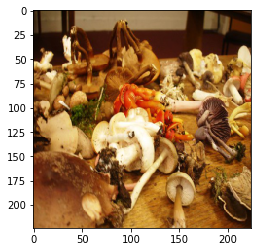

Showing 1 index image


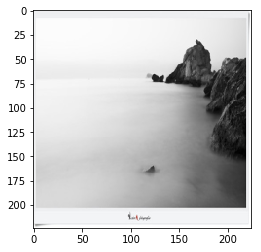

Showing 2 index image


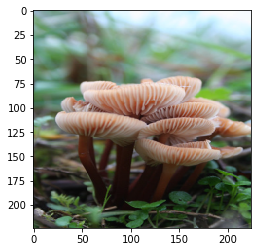

Showing 3 index image


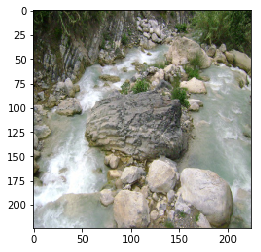

Showing 4 index image


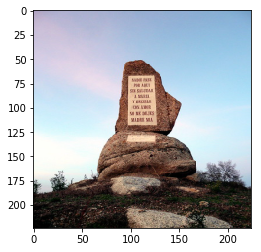

Showing 5 index image


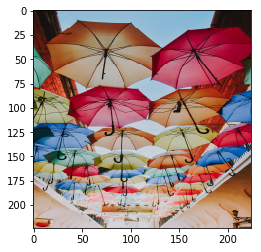

Showing 6 index image


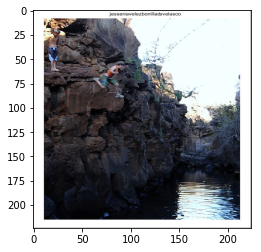

Showing 7 index image


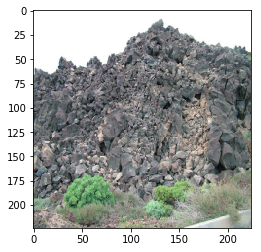

Showing 8 index image


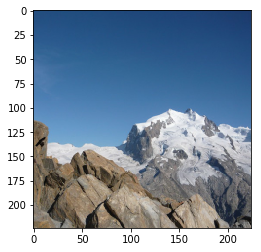

Showing 9 index image


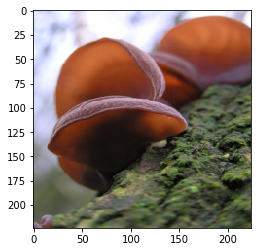

In [11]:
# Randomly shuffle each set
np.random.RandomState(10)
np.random.shuffle(allflrDat)
np.random.shuffle(allnonflrDat)

# Show 10 examples of the images, if it's shuffled it shouldn't all be one type

data = allnonflrDat

for i in range(10):
    index = i
    print("Showing %s index image" %(index))
    imgplot = plt.imshow(data[index])
    plt.show()

In [12]:
# Tag all flowers to 1 and all non-flowers to 0
allflrLbl = np.ones((allflrDat.shape[0]))
allnonflrLbl = np.zeros((allnonflrDat.shape[0]))

print("For the flower and non-flower label datasets:")
print("The shapes are %s, %s" \
      %(allflrLbl.shape, allnonflrLbl.shape))

For the flower and non-flower label datasets:
The shapes are (2689,), (2105,)


In [13]:
import math

trSplit = 0.8
trflr_index = math.floor(trSplit*allflrLbl.shape[0])
trnonflr_index = math.floor(trSplit*allnonflrLbl.shape[0])

print("Indices for %s split is %s and %s" %(trSplit, trflr_index, trnonflr_index))

Indices for 0.8 split is 2151 and 1684


In [14]:
trDat = np.vstack((allflrDat[0:trflr_index,], allnonflrDat[0:trnonflr_index,]))
trLbl = np.concatenate((allflrLbl[0:trflr_index,], allnonflrLbl[0:trnonflr_index,]))
tsDat = np.vstack((allflrDat[trflr_index:,], allnonflrDat[trnonflr_index:,]))
tsLbl = np.concatenate((allflrLbl[trflr_index:,], allnonflrLbl[trnonflr_index:,]))

print("For the training and test datasets:")
print("The shapes are %s, %s, %s, %s" \
      %(trDat.shape, trLbl.shape, tsDat.shape, tsLbl.shape))

For the training and test datasets:
The shapes are (3835, 224, 224, 3), (3835,), (959, 224, 224, 3), (959,)


In [16]:
trLbl[trflr_index-2:trflr_index+2]

np.savez("./npz/flrnonflr-train-imgs224-0.8.npz", trDat, allow_pickle=False)
np.savez("./npz/flrnonflr-train-labels224-0.8.npz", trLbl, allow_pickle=False)
np.savez("./npz/flrnonflr-test-imgs224-0.8.npz", tsDat, allow_pickle=False)
np.savez("./npz/flrnonflr-test-labels224-0.8.npz", tsLbl, allow_pickle=False)